<a href="https://colab.research.google.com/github/shashigharti/secure-ai/blob/master/week2/collab/dicom_to_jpeg_conversion_kernel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!tar xvzf dicom-images-test.tar.gz

In [4]:
!pip install pydicom

In [5]:
!pip install opencv-python

In [0]:
import cv2
import os
import pydicom
import glob

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [7]:
pwd

'/content'

In [0]:
!mkdir output-dir

In [0]:
inputdir = 'dicom-images-test'
outdir = 'output-dir'

In [0]:
# get all dcm files from the test folder
def getAllFiles(path, type = '.dcm'):
    dcmFiles = []
    for dirpath, subdirs, files in os.walk(path):
        for x in files:
            if x.endswith(type):
                dcmFiles.append([dirpath, x])
    return dcmFiles

allDCMImages = getAllFiles(inputdir)

In [0]:
for file in allDCMImages:
    filename = os.path.join(file[0],file[1])
    ds = pydicom.read_file(filename)  # read dicom image
    img = ds.pixel_array  # get image array

    #print(filename)
    print(outdir + "/" + file[0])
    if not os.path.exists(outdir + "/" + file[0]):
        os.makedirs(outdir + "/" + file[0])

    cv2.imwrite(outdir + "/" + filename.replace('.dcm', '.png'), img)  # write png image

In [0]:
allOutputImages = getAllFiles(outdir, '.png')

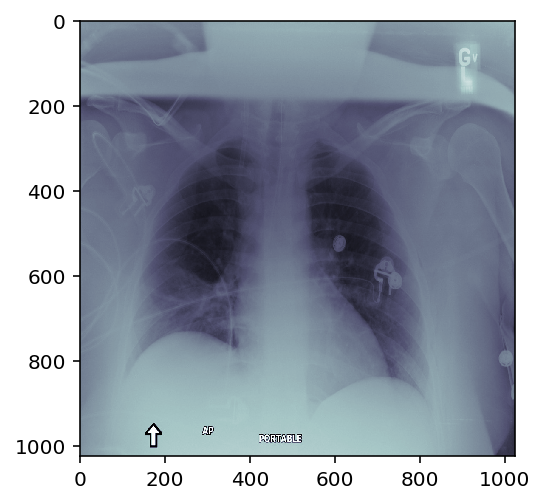

In [63]:
# plot DCM Image
for (index, file) in enumerate(allDCMImages[:1]): 
  
	# define filename
	filename = os.path.join(file[0],file[1])  
    
	# load dcm image
	image = pydicom.dcmread(filename)
  
	# plot image
	plt.imshow(image.pixel_array, cmap=plt.cm.bone)

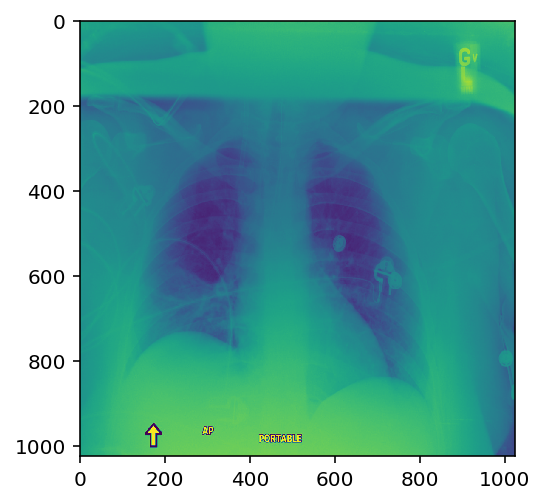

In [66]:
# plot png image
for (index, file) in enumerate(allOutputImages[:1]): 
  
	# define filename
	filename = os.path.join(file[0],file[1])  
    
	# load dcm image
	image = imread(filename)
  
	# plot image
	plt.imshow(image)
